In [60]:
import pandas as pd
from datetime import datetime
from datetime import timedelta
import plotly.graph_objects as go
import warnings

warnings.filterwarnings('ignore')

# plot the open price
# x = df["ds"]
# y = df["y"]
# fig = go.Figure()
# fig.add_trace(go.Scatter(x=x, y=y))
# # Set title
# fig.update_layout(
#     title_text="Time series plot of Ethereum Open Price",
# )
# fig.update_layout(
#     xaxis=dict(
#         rangeselector=dict(
#             buttons=list(
#                 [
#                     dict(count=1, label="1m", step="month", stepmode="backward"),
#                     dict(count=6, label="6m", step="month", stepmode="backward"),
#                     dict(count=1, label="YTD", step="year", stepmode="todate"),
#                     dict(count=1, label="1y", step="year", stepmode="backward"),
#                     dict(step="all"),
#                 ]
#             )
#         ),
#         rangeslider=dict(visible=True),
#         type="date",
#     )
# )
# fig.show()



In [61]:
import yfinance as yf

pd.options.display.float_format = '${:,.2f}'.format

today = datetime.today().strftime('%Y-%m-%d')
start_date = '2016-01-01'

eth_df = yf.download('ETH-USD', start_date, today)

eth_df.tail()

eth_df.info()

# print(eth_df.isnull().sum())

eth_df

eth_df.reset_index(inplace=True)
#To see the columns 
eth_df.columns 

[*********************100%***********************]  1 of 1 completed
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1886 entries, 2017-11-09 to 2023-01-07
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1886 non-null   float64
 1   High       1886 non-null   float64
 2   Low        1886 non-null   float64
 3   Close      1886 non-null   float64
 4   Adj Close  1886 non-null   float64
 5   Volume     1886 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 103.1 KB


Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [62]:
#Select the date and price
df = eth_df[["Date", "Close"]]
#Rename the features:
new_names = {
    "Date": "ds", 
    "Close": "y",
}
df.rename(columns=new_names, inplace=True)
#Show the data
df

,ds,y
0,2017-11-09,$320.88
1,2017-11-10,$299.25
2,2017-11-11,$314.68
3,2017-11-12,$307.91
4,2017-11-13,$316.72
...,...,...
1881,2023-01-03,"$1,214.78"
1882,2023-01-04,"$1,256.53"
1883,2023-01-05,"$1,250.44"
1884,2023-01-06,"$1,269.38"


In [63]:
from prophet import Prophet
#Create the Prophet object (model)
m = Prophet(daily_seasonality = True)
#Fit or train the model
m.fit(df)
future = m.make_future_dataframe(periods = 365)
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

21:37:04 - cmdstanpy - INFO - Chain [1] start processing
21:37:05 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper
2246,2024-01-03,"$-1,687.38","$-2,768.48",$-551.40
2247,2024-01-04,"$-1,700.29","$-2,786.31",$-589.98
2248,2024-01-05,"$-1,711.45","$-2,756.28",$-592.28
2249,2024-01-06,"$-1,715.06","$-2,785.81",$-566.50
2250,2024-01-07,"$-1,724.41","$-2,815.10",$-567.43


In [64]:
#Import the facebook prophet plotting libraries
from prophet.plot import plot_plotly, plot_components_plotly, add_changepoints_to_plot

#plot the data
plot_plotly(m, forecast)

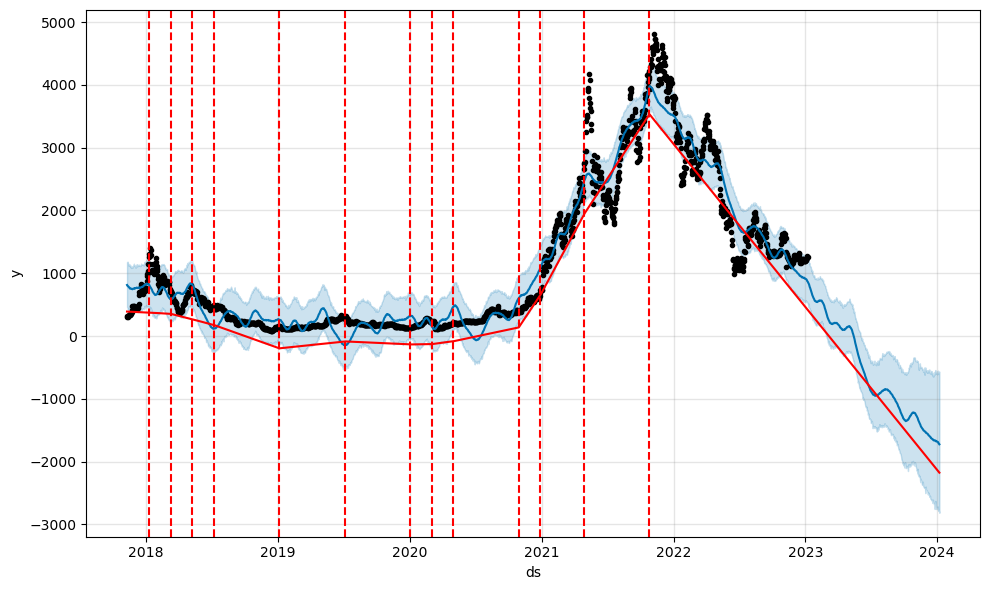

In [65]:
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

In [66]:
#Inserting specific chagepoints
m = Prophet(changepoints=['2022-11-02'][''])
forecast = m.fit(df).predict(future)
fig = m.plot(forecast)

TypeError: list indices must be integers or slices, not str

In [ ]:
#Show the models prediction for the 15-10-2021
forecast[forecast.ds == '2021-10-15']['yhat']

1436   $1,669.99
Name: yhat, dtype: float64

In [ ]:
#Show the actual price for the 15-10-2021
df[df.ds == '2021-10-15']['yhat']

KeyError: 'yhat'

In [ ]:
#Show the models prediction for the next day 
next_day = (datetime.today() + timedelta(days=1)).strftime('%Y-%m-%d')
forecast[forecast['ds'] == next_day]['yhat'].item()

851.2786712013319

In [ ]:
plot_components_plotly(m, forecast)

21:29:17 - cmdstanpy - INFO - Chain [1] start processing
21:29:17 - cmdstanpy - INFO - Chain [1] done processing


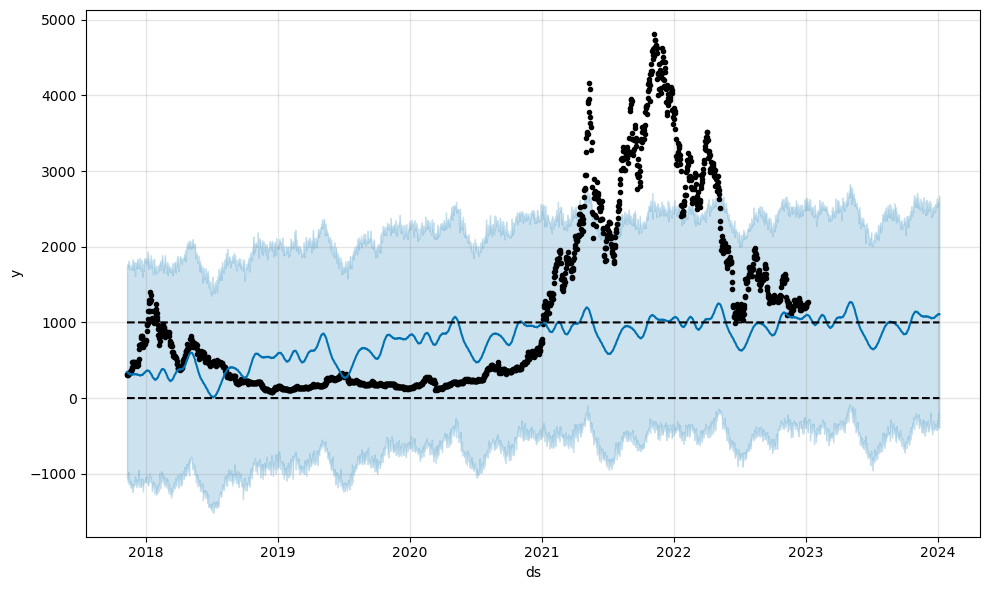

In [ ]:
df['cap'] = 1000
df['floor'] = 0
future['cap'] = 1000
future['floor'] = 0
m = Prophet(growth='logistic')
m.fit(df)
fcst = m.predict(future)
fig = m.plot(fcst)